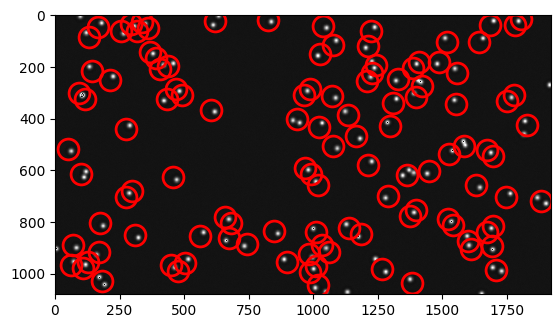

<Axes: >

In [39]:
import trackpy as tp
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
path_sim = "../simulated_image.png"
path_real = "/home/npopkov/parsim/COOH_DestH2O_PMMA700nm_2mT_24ms_1009.bmp"
img = cv2.imread(path_sim, cv2.IMREAD_GRAYSCALE)
img = img.astype('float32') / 255.0
f = tp.locate(img, 31, invert=True)
tp.annotate(f, img)

In [41]:
# cut out the particles 30x30
size = 40
folder_name = 'particle_cutouts_sim'
for index, row in f.iterrows():
    x, y = int(row['x']), int(row['y'])
    cutout = img[y-size//2:y+size//2, x-size//2:x+size//2]
    cutout = np.clip(cutout, 0, 1)
    
    #check if folder particle_cutouts exists, if not create it
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    if cutout.shape == (size, size):
        plt.imsave(f'{folder_name}/particle_{index}.png', cutout, cmap='gray')